<a href="https://colab.research.google.com/github/gbroy1999/deep-learning/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [0]:
from keras import backend as K

In [0]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
#x_validation = x_test[:5000]
#x_test = x_test[5000:]

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28 , 28 , 1)
x_test = x_test.reshape(x_test.shape[0], 28 , 28 , 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D,Dense
from tensorflow.keras.optimizers import SGD

In [0]:
x_train.shape
#x_test.shape
#x_validation.shape

(60000, 28, 28, 1)

In [0]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [0]:
input_shape=(28,28,1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10,batch_size=20)

Epoch 1/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.4905 - acc: 0.8200
Epoch 2/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.3200 - acc: 0.8825
Epoch 3/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.2762 - acc: 0.8981
Epoch 4/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.2457 - acc: 0.9096
Epoch 5/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.2252 - acc: 0.9155
Epoch 6/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.2045 - acc: 0.9229
Epoch 7/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.1900 - acc: 0.9282
Epoch 8/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.1790 - acc: 0.9326
Epoch 9/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.1651 - acc: 0.9379
Epoch 10/10
60000/60000 [==============================] - 12s 208us/step - loss: 

In [0]:
import matplotlib.pyplot as plt


6


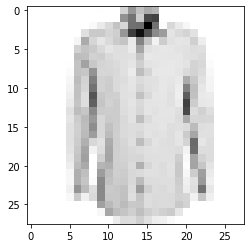

In [0]:
image_index = 8060
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
pred = model.predict (x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())
